In [1]:
using Plots
using AugmentedGaussianProcesses
const AGP = AugmentedGaussianProcesses
using Distributions

## Creating some random data

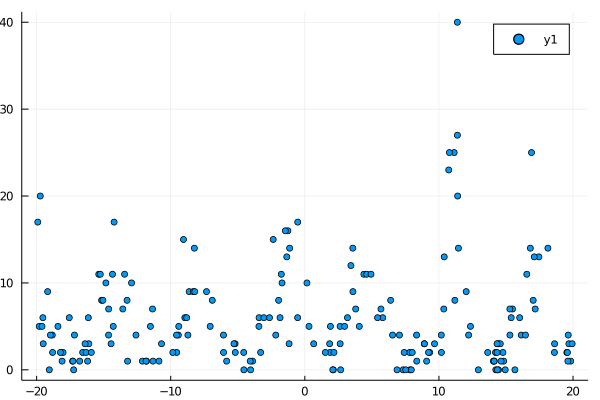

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = transform(SqExponentialKernel(), 1.0)
m_negbinomial = VGP(X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(), optimiser = false, verbose = 2)
@time train!(m_negbinomial, 20)

Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 200 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:00
  iter:  20
  ELBO:  -520.4263761126213
Training ended after 20 iterations. Total number of iterations 20
  1.534111 seconds (2.83 M allocations: 217.344 MiB)


## Running the same model but with a Poisson likelihood

In [4]:
kernel = transform(SqExponentialKernel(), 1.0)
m_poisson = VGP(X, Y, kernel, PoissonLikelihood(r), AnalyticVI(), optimiser = false, verbose = 2)
@time train!(m_poisson, 20)

Starting training Variational Gaussian Process with a Poisson Likelihood infered by Analytic Variational Inference  with 200 samples, 200 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:00
  iter:  20
  ELBO:  -697.8722359969554
Training ended after 20 iterations. Total number of iterations 20
  1.007125 seconds (2.15 M allocations: 186.338 MiB)


Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20; maxs = 20
    x_grid = range(mins, maxs, length = n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X,Y)
    return Plots.scatter(X, Y, alpha=0.33,
                msw=0.0, lab="", size=(800,500))
end

function plot_model(model, X, Y, title = nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model,n_grid)
    p = plot_data(X, Y)
    Plots.plot!(p, x_grid, y_grid,
                ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
                title=title,
                color="red",
                lab="",
                linewidth=3.0)
    if model isa SVGP # Plot the inducing points as well
        Plots.plot!(p,
                    vec(model.f[1].Z),
                    zeros(dim(model.f[1])),
                    msize=2.0,
                    color="black",t=:scatter,lab="")
    end
    return p
end;

## Comparison between the two likelihoods

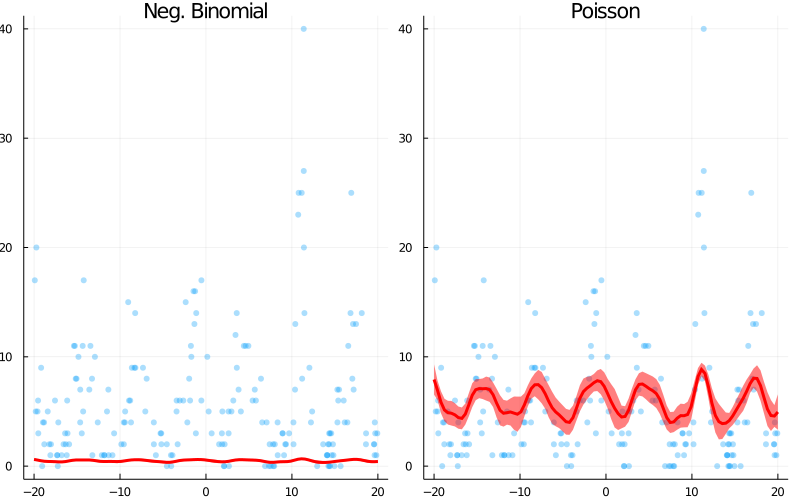

In [7]:
Plots.plot(plot_model.([m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"])...,
            layout=(1, 2))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*